In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
files = {
    'L3': '../data/l3.csv',
    'L3 Non-Temporal': '../data/l3nt.csv',
    'Non-Temporal': '../data/nontemporal.csv',
    'Plain': '../data/plain.csv'
}

In [28]:
# Read the data
data = {name: pd.read_csv(filepath) for name, filepath in files.items()}

for name in data: 
    data[name].columns = data[name].columns.str.replace(' ', '', regex=False)

In [30]:
average_runtimes = []

for name, dataframe in data.items():
    # Calculate runtime
    dataframe['runtime'] = dataframe['duration'] * dataframe['factor']
    # Calculate and store the average runtime
    avg_runtime = dataframe['runtime'].mean()
    average_runtimes.append((name, avg_runtime))

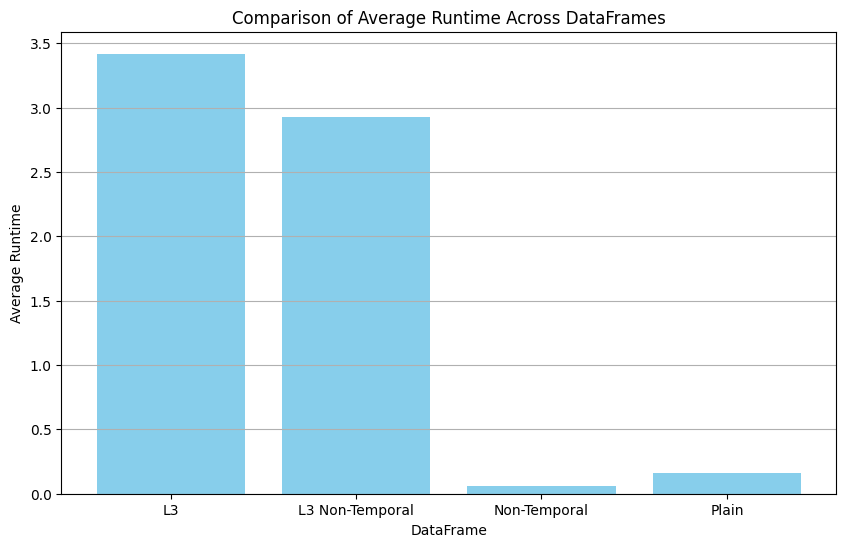

In [31]:
# Convert to DataFrame for easier plotting
avg_runtime_df = pd.DataFrame(average_runtimes, columns=['DataFrame', 'Average Runtime'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_runtime_df['DataFrame'], avg_runtime_df['Average Runtime'], color='skyblue')
plt.xlabel('DataFrame')
plt.ylabel('Average Runtime')
plt.title('Comparison of Average Runtime Across DataFrames')
plt.grid(axis='y')
plt.ylim(bottom=0)  # Ensure the y-axis starts at 0

plt.show()